In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/games.csv")

df.head()

,home,away,date,odd_home,odd_tie,odd_away,championship,winner
0,Newcastle,Wolverhampton,2022-04-08,2.25,3.20,3.40,Premier League,home
1,Everton,Man Utd,2022-04-09,4.50,3.75,1.75,Premier League,home
2,Arsenal,Brighton,2022-04-09,1.61,3.80,5.75,Premier League,away
3,Southampton,Chelsea,2022-04-09,4.00,3.75,1.90,Premier League,away
4,Watford,Leeds,2022-04-09,2.70,3.40,2.55,Premier League,away


In [17]:
df[df["winner"].isnull()]

,home,away,date,odd_home,odd_tie,odd_away,championship,winner
16,Espanhol,Celta de Vigo,2022-04-10,2.75,3.20,2.70,La Liga,NaN
110,Chelsea,Arsenal,2022-04-20,2.00,3.50,3.75,Premier League,NaN
111,Everton,Leicester,2022-04-20,2.40,3.30,2.90,Premier League,NaN
112,Newcastle,Crystal Palace,2022-04-20,2.40,3.30,2.90,Premier League,NaN
113,Man City,Brighton,2022-04-20,1.18,6.50,17.00,Premier League,NaN
...,...,...,...,...,...,...,...,...
453,Shimizu S-Pulse,Sanfrecce Hiroshima,2022-04-29,3.50,3.25,2.10,J-league (Japão),NaN
454,Kyoto Sanga FC,Avispa Fukuoka,2022-04-29,2.80,3.10,2.60,J-league (Japão),NaN
455,Cerezo Osaka,Kashima Antlers,2022-04-29,3.30,3.60,2.05,J-league (Japão),NaN
456,Kashiwa Reysol,Sagan Tosu,2022-04-29,2.30,3.20,3.10,J-league (Japão),NaN


In [3]:
df = df[~df["winner"].isnull()]

In [4]:
df.loc[df["odd_home"] < df["odd_away"], "lower"] = "home"
df.loc[df["odd_home"] < df["odd_away"], "lower_odd"] = df["odd_home"]

df.loc[df["odd_away"] < df["odd_home"], "lower"] = "away"
df.loc[df["odd_away"] < df["odd_home"], "lower_odd"] = df["odd_away"]

df.head()

,home,away,date,odd_home,odd_tie,odd_away,championship,winner,lower,lower_odd
0,Newcastle,Wolverhampton,2022-04-08,2.25,3.20,3.40,Premier League,home,home,2.25
1,Everton,Man Utd,2022-04-09,4.50,3.75,1.75,Premier League,home,away,1.75
2,Arsenal,Brighton,2022-04-09,1.61,3.80,5.75,Premier League,away,home,1.61
3,Southampton,Chelsea,2022-04-09,4.00,3.75,1.90,Premier League,away,away,1.90
4,Watford,Leeds,2022-04-09,2.70,3.40,2.55,Premier League,away,away,2.55


In [8]:
print("Quantidade de jogos:", len(df))
print("Proporção de empates:", len(df[df["winner"] == "tie"])/len(df))

Quantidade de jogos: 158
Proporção de empates: 0.21518987341772153


In [9]:
df.loc[df["winner"] == df["lower"], "profit"] = (5 * df["lower_odd"]) - 5
df.loc[df["winner"] != df["lower"], "profit"] = -5

df.head()

,home,away,date,odd_home,odd_tie,odd_away,championship,winner,lower,lower_odd,profit
0,Newcastle,Wolverhampton,2022-04-08,2.25,3.20,3.40,Premier League,home,home,2.25,6.25
1,Everton,Man Utd,2022-04-09,4.50,3.75,1.75,Premier League,home,away,1.75,-5.00
2,Arsenal,Brighton,2022-04-09,1.61,3.80,5.75,Premier League,away,home,1.61,-5.00
3,Southampton,Chelsea,2022-04-09,4.00,3.75,1.90,Premier League,away,away,1.90,4.50
4,Watford,Leeds,2022-04-09,2.70,3.40,2.55,Premier League,away,away,2.55,7.75


In [10]:
df["profit"].sum()

28.450000000000003

In [11]:
df[["championship", "profit"]].groupby("championship").sum()

,profit
championship,
Brasileirao,12.65
Bundesliga,18.20
Champions League,-20.00
Conference League,10.50
Europa League,-10.50
La Liga,15.75
Libertadores,0.65
Ligue 1,-4.25
Premier League,8.35


In [12]:
df[["championship", "winner"]].groupby("championship").value_counts()

championship       winner
Brasileirao        home      10
                   away       6
                   tie        4
Bundesliga         away       8
                   home       7
                   tie        3
Champions League   tie        3
                   away       1
Conference League  away       3
                   home       1
Europa League      away       3
                   home       1
La Liga            away       9
                   home       7
                   tie        3
Libertadores       home      11
                   tie        5
Ligue 1            home       9
                   tie        7
                   away       4
Premier League     home       9
                   away       6
                   tie        2
Serie A            home       8
                   away       7
                   tie        5
Sul-Americana      home      10
                   away       4
                   tie        2
dtype: int64

In [13]:
df[["date", "profit"]].groupby("date").sum()

,profit
date,
2022-04-08,19.10
2022-04-09,19.80
2022-04-10,-0.95
2022-04-11,-4.50
2022-04-12,14.40
2022-04-13,-4.25
2022-04-14,-13.15
2022-04-15,-6.85
2022-04-16,5.10


In [11]:
print("Minimum value:", df["lower_odd"].min())
print("Maximum value:", df["lower_odd"].max())

Minimum value: 1.09
Maximum value: 2.7


In [12]:
profits = []
for odd in np.arange(1, 2.6, step=0.1):
    aux_min = df[df["lower_odd"] > odd]
    aux_max = df[df["lower_odd"] < odd]
    profits.append({
        "odd": odd,
        "profit_min": aux_min["profit"].sum(),
        "profit_max": aux_max["profit"].sum(),
    })
profits = pd.DataFrame(profits)
profits.head()

,odd,profit_min,profit_max
0,1.0,41.20,0.00
1,1.1,40.75,0.45
2,1.2,38.70,2.50
3,1.3,47.65,-6.45
4,1.4,44.00,-2.80


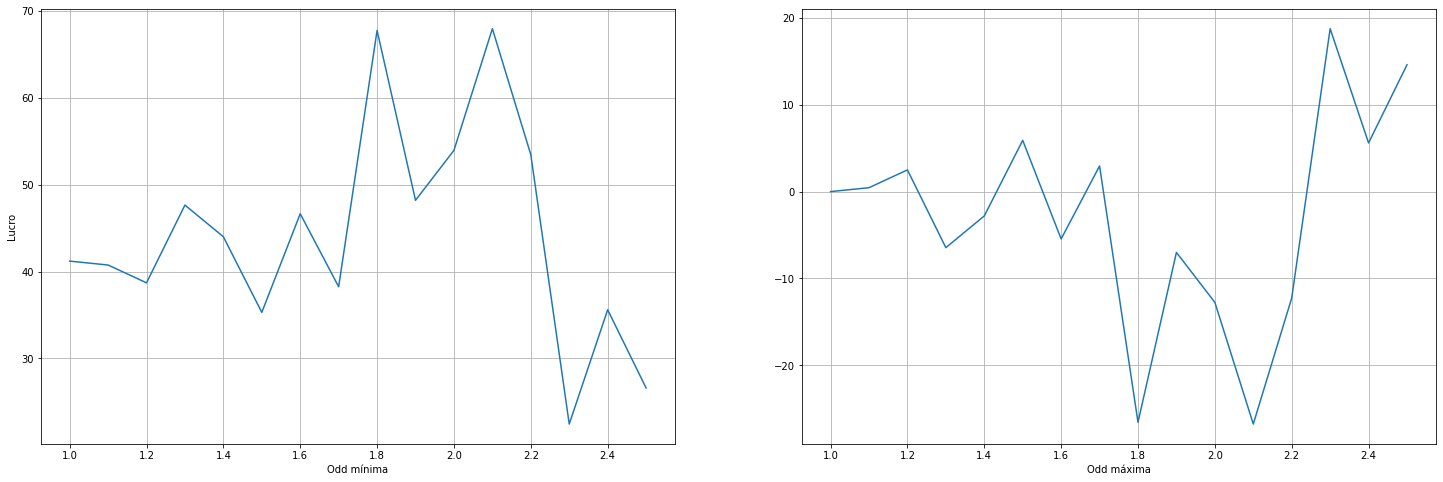

In [13]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(profits["odd"], profits["profit_min"])
plt.xlabel("Odd mínima")
plt.ylabel("Lucro")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(profits["odd"], profits["profit_max"])
plt.xlabel("Odd máxima")
plt.grid()
plt.show()

In [14]:
profits[profits["profit_min"] == profits["profit_min"].max()]

,odd,profit_min,profit_max
11,2.1,67.95,-26.75


In [15]:
df = df[df["lower_odd"] < 2.4]
df[["championship", "profit"]].groupby("championship").sum()

,profit
championship,
Brasileirao,14.65
Bundesliga,7.95
Champions League,-15.00
Conference League,3.25
Europa League,-5.50
La Liga,-10.75
Libertadores,10.65
Ligue 1,10.75
Premier League,0.60


In [16]:
df["profit"].sum()

15.599999999999998